In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

%matplotlib inline

34.453140096618355


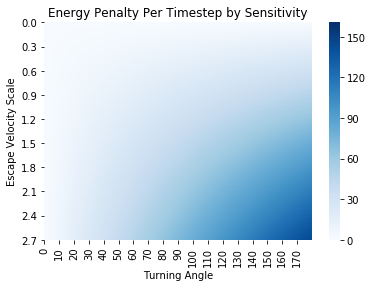

In [98]:
x = np.array(range(1,300, 1))/100 # scale
y = range(0, 180, 1) #turning angle

z = np.zeros([len(x), len(y)])
for i, ival in enumerate(x):
    for j in y:
        z[i][j] = ival * j* 0.3
print(np.sum(np.where(z>=100))/(len(x)*len(y)))
ax =sns.heatmap(z, linewidth = 0, cmap  = plt.get_cmap('Blues'))
ax.set_xticks(range(0, 180, 10))
ax.set_xticklabels(range(0, 190, 10))
ax.set_xlabel('Turning Angle')

ax.set_yticks(range(0, 300, 30))
ax.set_yticklabels(np.array(range(0, 300, 30))/100)
ax.set_ylabel('Escape Velocity Scale')

ax.set_title("Energy Penalty Per Timestep by Sensitivity")
plt.savefig('EnergyPenalty.png')

In [25]:
random_data = pd.read_csv('Data/Hist',low_memory = False)# for random mating
random_data = delistify(random_data)

In [54]:
hist_data.head()


,Unnamed: 0,[run number],count birds,[escape-velocity-scale] of birds,[escape-angle] of birds,[detection-radius] of birds,[detection-angle] of birds,[neighbor-sensitivity] of birds,ticks
0,0,2,400,"[2.26, 2.49, 1.83, 2.2199999999999998, 2.13, 1...","[150.0, 179.0, 61.0, 16.0, 123.0, 179.0, 153.0...","[8.0, 5.0, 5.0, 0.0, 0.0, 1.0, 2.0, 7.0, 2.0, ...","[74.0, 319.0, 127.0, 13.0, 347.0, 352.0, 243.0...","[1.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, ...",0
1,1,1,400,"[1.07, 1.22, 2.55, 1.63, 2.35, 2.63, 1.55, 1.4...","[1.0, 85.0, 74.0, 154.0, 149.0, 9.0, 49.0, 55....","[3.0, 0.0, 2.0, 4.0, 7.0, 6.0, 1.0, 0.0, 4.0, ...","[296.0, 205.0, 111.0, 51.0, 182.0, 102.0, 170....","[2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 5.0, 5.0, 2.0, ...",0
2,2,3,400,"[2.62, 2.77, 1.6600000000000001, 2.2, 1.16, 2....","[58.0, 54.0, 66.0, 62.0, 93.0, 168.0, 163.0, 1...","[9.0, 2.0, 2.0, 0.0, 3.0, 4.0, 5.0, 7.0, 9.0, ...","[208.0, 206.0, 24.0, 18.0, 54.0, 321.0, 27.0, ...","[5.0, 2.0, 1.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, ...",0
3,3,4,400,"[1.5899999999999999, 2.08, 1.75, 1.9, 2.48, 1....","[120.0, 121.0, 108.0, 55.0, 143.0, 85.0, 32.0,...","[0.0, 6.0, 4.0, 2.0, 8.0, 9.0, 3.0, 9.0, 5.0, ...","[257.0, 118.0, 245.0, 115.0, 185.0, 52.0, 56.0...","[5.0, 4.0, 3.0, 5.0, 4.0, 2.0, 3.0, 5.0, 4.0, ...",0
4,4,2,397,"[2.88, 1.99, 1.62, 1.07, 2.31, 1.35, 1.65, 1.7...","[160.0, 88.0, 53.0, 62.0, 29.0, 106.0, 130.0, ...","[3.0, 4.0, 8.0, 1.0, 9.0, 2.0, 6.0, 2.0, 0.0, ...","[325.0, 184.0, 276.0, 31.0, 357.0, 307.0, 136....","[2.0, 4.0, 5.0, 1.0, 5.0, 4.0, 4.0, 4.0, 4.0, ...",1


In [3]:
hist_data= pd.read_csv('HistData.csv')
hist_data = delistify(hist_data)

In [26]:
def get_heatmap_data(data, var, bins):
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    hists = []
    labels = []
    for i in range(200, 15001, 100):
        temp = data[data['ticks']==i]
        all_data= []
        for list_data in temp[var]:
            all_data +=list_data
#         print(all_data)
        n, X, V = ax.hist(all_data, density = True, bins =bins)
        if i == 200:
            labels = X
        hists.append(list(n))
    return hists, labels

In [99]:
def graph(labels, hists, title,xlab, filename):
    labels = [round(i, 1) for i in labels]
    print(labels)
    print(np.array(hists).shape)
    ax =sns.heatmap(np.transpose(np.array(hists)), linewidth = 0, cmap  = plt.get_cmap('Blues'))
    ax.set_xlabel('Timestep', fontsize = 15)
    ax.set_ylabel(xlab, fontsize = 15)

    ax.set_xticks(range(0, 151, 10))
    ax.set_xticklabels(range(0, 15001, 1000), rotation = 45)

    ax.set_yticklabels(labels, rotation = 'horizontal')
    ax.set_title(title, fontsize = 20)
    plt.savefig(filename)
    plt.show()


In [49]:
def graph_mean_sem(df, sensitivity_types, units, limits, mating_type, titles):
    for s_type, unit,limit, title in zip(sensitivity_types, units, limits, titles):
        mus = []
        sems = []
        for i in range(0, 15002):
            temp = df[ df['ticks'] == float(i)][[ 'count birds', s_type]]
            
            all_data = []
            for list_data in temp[s_type]:
                all_data +=list_data
                
            mus.append(np.mean(all_data))
            std = np.sqrt(np.var(all_data))
            count = np.sum(temp['count birds'])
            sems.append(std/np.sqrt(count))

        fig, ax = plt.subplots(1,1,figsize=(8,8))
        ax.errorbar(x = range(15002), y = mus, yerr = sems, color = 'black',ecolor = '#2d9cc4')
        ax.set_xlim([0, 15000])
        ax.set_ylim(limit)
        ax.set_title(title)
        ax.set_xlabel('Ticks')
        ax.set_ylabel(unit)
        filename = s_type + mating_type + '.png'
        plt.savefig(filename)

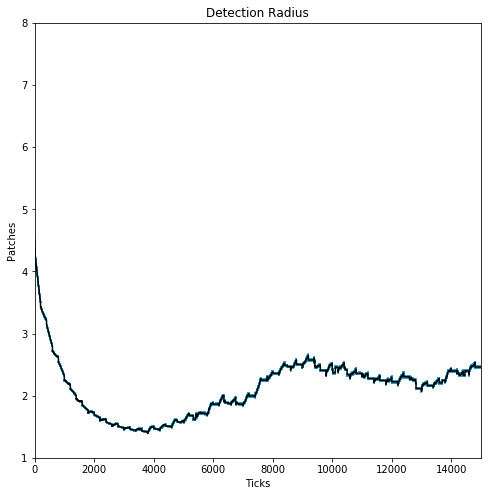

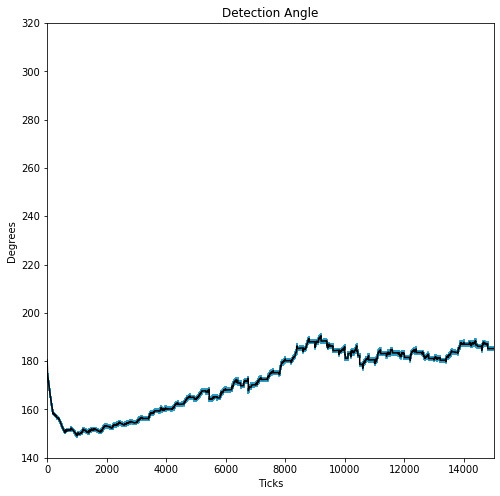

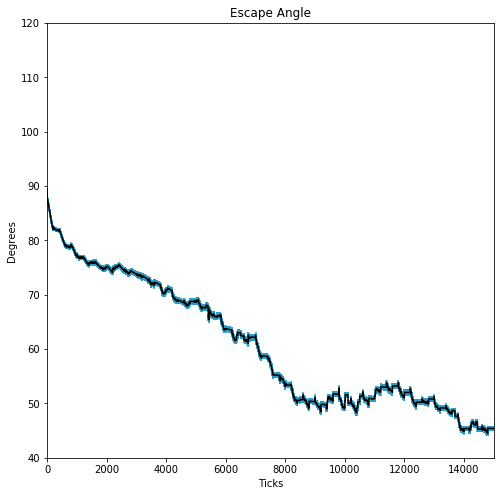

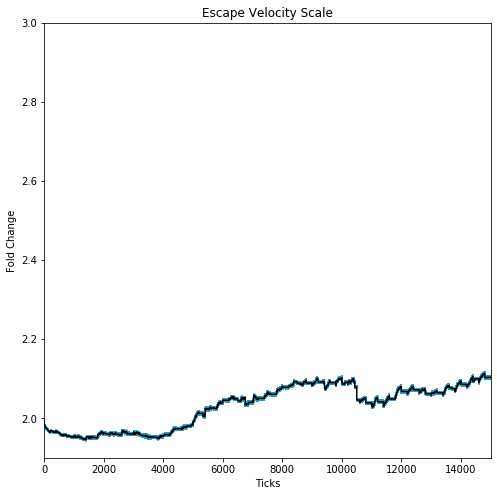

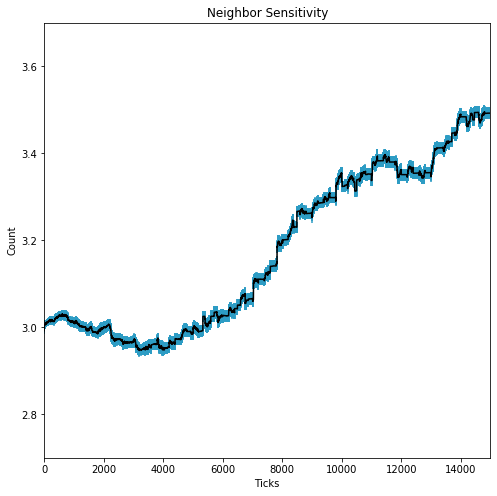

In [56]:
sensitivity_types = ['[detection-radius] of birds', '[detection-angle] of birds', '[escape-angle] of birds', 
                     '[escape-velocity-scale] of birds',  '[neighbor-sensitivity] of birds']
units = ['Patches', 'Degrees', 'Degrees', 'Fold Change', 'Count']
limits = [[1, 8],[140, 320], [40, 120],[1.9, 3], [2.7, 3.7] ]
titles = ['Detection Radius', 'Detection Angle','Escape Angle','Escape Velocity Scale',    'Neighbor Sensitivity']

graph_mean_sem(hist_data, sensitivity_types, units, limits, 'energymating', titles )

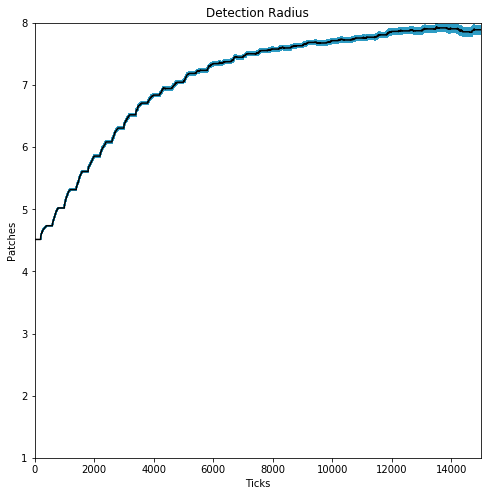

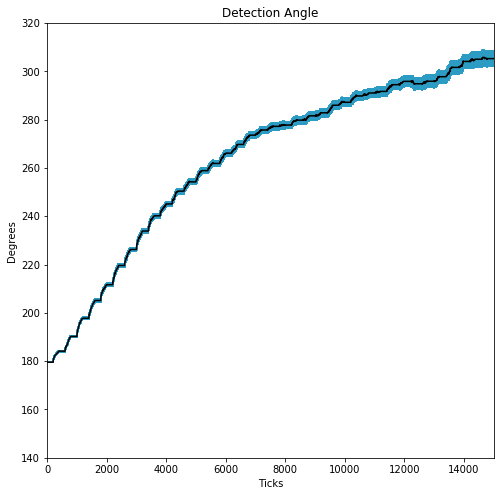

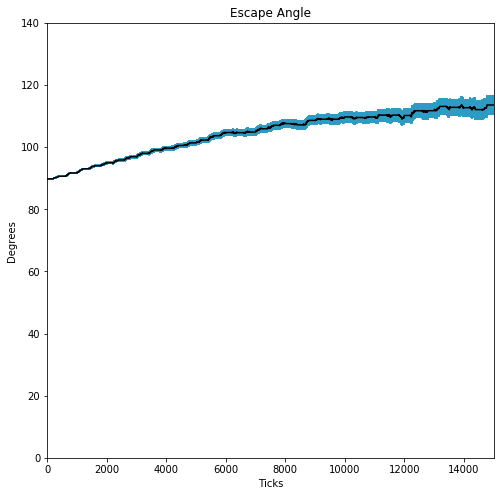

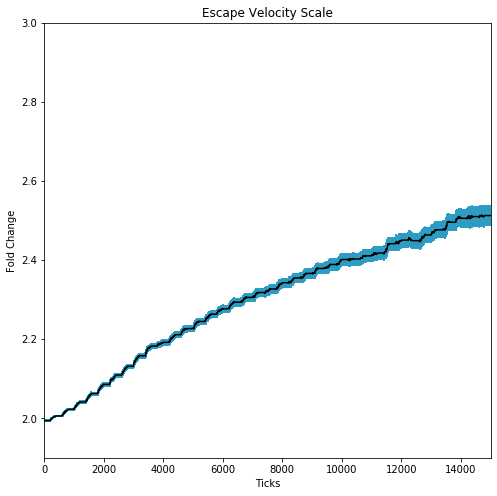

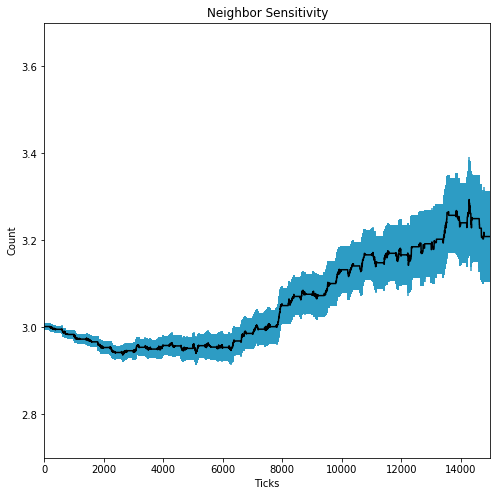

In [57]:
sensitivity_types = ['[detection-radius] of birds', '[detection-angle] of birds', '[escape-angle] of birds', 
                     '[escape-velocity-scale] of birds',  '[neighbor-sensitivity] of birds']
units = ['Patches', 'Degrees', 'Degrees', 'Fold Change', 'Count']
limits = [[1, 8],[140, 320], [0, 140],[1.9, 3], [2.7, 3.7] ]
titles = ['Detection Radius', 'Detection Angle','Escape Angle','Escape Velocity Scale',    'Neighbor Sensitivity']

graph_mean_sem(random_data, sensitivity_types, units, limits, 'mating', titles )

[escape-velocity-scale] of birds Escape Velocity Scale Fold Change EVSHistRandom.png
[0.0, 0.0, 0.038461538461538415, 0.038461538461538484, 0.11538461538461545, 0.2307692307692305, 0.42307692307692324, 0.5000000000000002, 0.4615384615384618, 0.5769230769230772, 1.038461538461539, 0.961538461538459, 1.1923076923076965, 1.4230769230769194]
[1.         1.14285714 1.28571429 1.42857143 1.57142857 1.71428571
 1.85714286 2.         2.14285714 2.28571429 2.42857143 2.57142857
 2.71428571 2.85714286 3.        ]
[1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.9, 2.0, 2.1, 2.3, 2.4, 2.6, 2.7, 2.9, 3.0]
(149, 14)


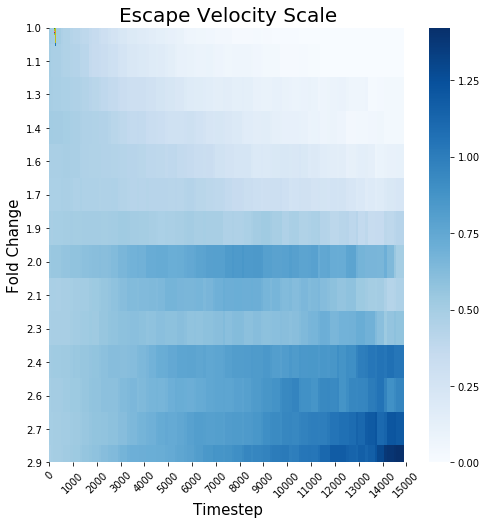

[escape-angle] of birds Escape Angle Degrees EAHistRandom.png



KeyboardInterrupt



<Figure size 576x576 with 0 Axes>

In [102]:
variables =  ['[escape-velocity-scale] of birds', '[escape-angle] of birds', '[detection-angle] of birds',
           '[detection-radius] of birds', '[neighbor-sensitivity] of birds']
titles = ['Escape Velocity Scale', 'Escape Angle', 'Detection Angle', 'Detection Radius', 'Neighbor Sensitivity']
xlabels = ['Fold Change', 'Degrees', 'Degrees', 'Patches', 'Count']
filenames = ['EVSHistRandom.png','EAHistRandom.png', 'DAHistRandom.png', 'DRHistRandom.png', 'NSHistRandom.png']
bins = [np.linspace(1, 3, 15), np.linspace(0, 180, 19), np.linspace(0, 360, 37), np.linspace(0, 10, 11), np.linspace(1,6,6)]

for var, tit, xlab, file, bin in zip(variables, titles, xlabels, filenames, bins):
    print(var, tit, xlab, file)
    data = random_data[['ticks',var ]]
    hists, labels = get_heatmap_data(data, var, bin)
    print(hists[-1])
    print(labels)
    graph(labels, hists, tit, xlab,file)

In [ ]:
variables =  ['[escape-velocity-scale] of birds', '[escape-angle] of birds', '[detection-angle] of birds',
           '[detection-radius] of birds', '[neighbor-sensitivity] of birds']
titles = ['Escape Velocity Scale', 'Escape Angle', 'Detection Angle', 'Detection Radius', 'Neighbor Sensitivity']
xlabels = ['Fold Change', 'Degrees', 'Degrees', 'Patches', 'Count']
filenames = ['EVSHist.png','EAHist.png', 'DAHist.png', 'DRHist.png', 'NSHist.png']
bins = [np.linspace(1, 3, 15), np.linspace(0, 180, 19), np.linspace(0, 360, 37), np.linspace(0, 10, 11), np.linspace(1,6,6)]

for var, tit, xlab, file, bin in zip(variables, titles, xlabels, filenames, bins):
    print(var, tit, xlab, file)
    data = hist_data[['ticks',var ]]
    hists, labels = get_heatmap_data(data, var, bin)
    print(hists[-1])
    graph(labels, hists, tit, xlab,file)

In [6]:
def pooled_variance_and_mean(varss, counts, mus):
    pooled_mu = 0
    denom = np.sum(counts)
    for mu, count in zip(mus, counts):
        pooled_mu += (mu * count)
    pooled_mu /= denom
    
    numerator = 0 
    for mu, var,count in zip(mus, varss, counts):
        numerator += count * (var + mu)
    pooled_var = (numerator/denom) - pooled_mu
        
    return pooled_mu, pooled_var, denom 

In [7]:
def exclude_runs(df, cutoff):
    '''Runs lasting less than 15000 ticks should be excluded. Returns a DataFrame with these runs removed. Also removes runs with primitive exceptions'''
    
    df= df.astype(str)
    df.replace({'<RuntimePrimitiveException>':np.nan}, inplace = True)
    df = df.astype(float)


    run_col =''
    for col in df.columns:
        df = df[~df[col].isnull()]
        
        if 'run number' in col:
            run_col = col
    counts = df[['ticks', run_col]].groupby(run_col).count()
   
    to_exclude = []
    for i in set(df[run_col]):
        if list(counts['ticks'])[int(i)-1] < cutoff:
            to_exclude.append(i)
            
    df = df[~df[run_col].isin(to_exclude)]
    df.rename(columns={run_col:'run_number'}, inplace  = True)
    return df

In [2]:
def delistify(df):
    columns = ['[escape-velocity-scale] of birds', '[escape-angle] of birds', '[detection-radius] of birds','[detection-angle] of birds',  '[neighbor-sensitivity] of birds']
    for col in columns:
        data = df[col]
        new_data = []
        for i in data:
            list_data = i.split(' ')
            list_data[0] = list_data[0].replace( '[', '')
            for i in range(len(list_data)):
                list_data[i] = list_data[i].replace(',', '')
            list_data[-1] = list_data[-1].replace(']','')
            list_data = list(map(float, list_data))
            list_data = [i if i != '<RuntimePrimitiveException>' else np.nan for i in list_data]
            new_data.append(list_data)
        df[col] = new_data
    return df

In [25]:
def clean_and_combine_data(filenames, cutoff, type = 'non-hist'):
    frames = []
    for file in filenames:
        print('Adding ', file, '...')
        temp = pd.read_csv(file,  engine = 'python', encoding ='utf-8', error_bad_lines= False)
        temp.drop(['kill-probability', 'kill-radius', 'population', 'kill-angle', '[step]'], axis = 1, inplace = True)
        if type == 'hist':
            print('delistifying')
            temp = delistify(temp)
        if type != 'hist':
            temp = exclude_runs(temp, cutoff, type)
        frames.append(temp)

    combined = pd.concat(frames)
    if type == 'non-hist':
        combined.columns = ['run_number', 'n_birds', 'ticks', 'mean_detection_radius', 'var_detection_radius',
                           'mean_detection_angle', 'var_detection_angle', 'mean_escape_angle', 'var_escape_angle',
                           'mean_escape_velocity', 'var_escape_velocity', 'mean_neighbor', 'var_neighbor']
        combined = combined.astype(float)

    print('Total n trials:',len(combined)/15000) #number of trials
    return combined

In [27]:
filenames = ['data/Flockingbase HIST ENERGY experiment-table', 'data/Flockingbase HIST ENERGY 1experiment-table',
            'data/Flockingbase Hist Energy 2 experiment-table', 'data/Flockingbase Hist Energy 3 experiment-table', 
            'data/Flockingbase Hist Energy 3experiment-table', 'data/FlockingbaseHist Energy 4 experiment-table',
            'data/Flockingbase Hist Energy 5 experiment-table','data/Flockingbase Hist Energy 6 experiment-table',
            'data/Flockingbase Hist Energy 7 experiment-table', 'data/Flockingbase Hist Energy 8 experiment-table',
            'data/Flockingbase Hist Energy 9 experiment-table', 'data/FlockingbaseHist Energy 10 experiment-table',
            'data/Flockingbase Hist Energy 10 experiment-table',]
hist_data = clean_and_combine_data(filenames, 15000, type = 'hist')

Adding  data/Flockingbase HIST ENERGY experiment-table ...
delistifying
Adding  data/Flockingbase HIST ENERGY 1experiment-table ...


Skipping line 75328: unexpected end of data


delistifying
Adding  data/Flockingbase Hist Energy 2 experiment-table ...
delistifying
Adding  data/Flockingbase Hist Energy 3 experiment-table ...


Skipping line 18132: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 34288: unexpected end of data


delistifying
Adding  data/Flockingbase Hist Energy 3experiment-table ...
delistifying
Adding  data/FlockingbaseHist Energy 4 experiment-table ...


Skipping line 45719: unexpected end of data


delistifying
Adding  data/Flockingbase Hist Energy 5 experiment-table ...


Skipping line 39150: unexpected end of data


delistifying
Adding  data/Flockingbase Hist Energy 6 experiment-table ...
delistifying
Adding  data/Flockingbase Hist Energy 7 experiment-table ...
delistifying
Adding  data/Flockingbase Hist Energy 8 experiment-table ...


Skipping line 14442: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 28206: unexpected end of data


delistifying
Adding  data/Flockingbase Hist Energy 9 experiment-table ...


Skipping line 114992: unexpected end of data


delistifying
Adding  data/FlockingbaseHist Energy 10 experiment-table ...
delistifying
Adding  data/Flockingbase Hist Energy 10 experiment-table ...


Skipping line 105385: unexpected end of data


delistifying
Total n trials: 77.18306666666666


In [35]:
hist_data.memory_usage()

Index                               9261968
[run number]                        9261968
count birds                         9261968
[escape-velocity-scale] of birds    9261968
[escape-angle] of birds             9261968
[detection-radius] of birds         9261968
[detection-angle] of birds          9261968
[neighbor-sensitivity] of birds     9261968
ticks                               9261968
dtype: int64

In [37]:
hist_data.to_csv('HistData.csv')

In [6]:
filenames = ['HistFiles/Flockingbase Histogram experiment-table','HistFiles/Flockingbase Histogram2 experiment-table','HistFiles/Flockingbase Histogram3 experiment-table','HistFiles/Flockingbase Histogram4 experiment-table','HistFiles/Flockingbase Histogarm 4 experiment-table','HistFiles/Flockingbase Histogram5 experiment-table',
             'HistFiles/Flockingbase Histogram6 experiment-table','HistFiles/Flockingbase Histogram7 experiment-table','HistFiles/Flockingbase Histogram8 experiment-table','HistFiles/Flockingbase Histogram9 experiment-table','HistFiles/Flockingbase Histogram10 experiment-table']
hist_data = clean_and_combine_data(filenames, 15000, type = 'hist')

Adding  HistFiles/Flockingbase Histogram experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram2 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram3 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram4 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogarm 4 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram5 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram6 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram7 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram8 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram9 experiment-table ...
delistifying
Adding  HistFiles/Flockingbase Histogram10 experiment-table ...
delistifying
Total n trials: 101.10473333333333


In [ ]:
hist_data.head()
hist_data.columns = ['run', 'count', 'escape_velocity_scale', 'escape_angle', 'detection_radius', 'detection_angle', 'neighbor_sensitivity']
hist_data.to_csv('AllHistData.csv')

In [15]:
filenames = ['FlockingBase400 experiment-table', 'FlockingBase400 pt2 experiment-table','FlockingBase400 pt3 experiment-table',
             'FlockingBase400 pt 4 experiment-table', 'FlockingBase400 pt5 experiment-table', 'FlockingBase400 pt 6 experiment-table',
            'FlockingBase400 pt 7 experiment-table']
energy_mating = clean_and_combine_data(filenames, 15000)
filenames = ["FlockingBase RAndom MAting 2experiment-table", "FlockingBase RandomMating3experiment-table", "FlockingBaseRandomMating experiment-table"]

random_mating = clean_and_combine_data(filenames, 0)

Total n trials: 32.00213333333333
Total n trials: 24.870666666666665


In [18]:
def graph(df, sensitivity_types, units, limits, mating_type):
    for s_type, unit,limit in zip(sensitivity_types, units, limits):
        mus = []
        sems = []
        for i in range(0, 15002):
            temp = df[ df['ticks'] == float(i)]
    #         print(temp, i)
            means_list = temp['mean_' + s_type]
            vars_list = temp['var_' + s_type]
            counts_list = temp['n_birds']

            pooled_mu, pooled_var, count = pooled_variance_and_mean(vars_list,counts_list, means_list)
            sem = np.sqrt(pooled_var)/np.sqrt(count)
            mus.append(pooled_mu)
            sems.append(sem)

        fig, ax = plt.subplots(1,1,figsize=(8,8))
        ax.errorbar(x = range(15002), y = mus, yerr = sems, color = 'black',ecolor = '#2d9cc4')
        ax.set_xlim([0, 15000])
        ax.set_ylim(limit)
        ax.set_title(s_type)
        ax.set_xlabel('Ticks')
        ax.set_ylabel(unit)
        filename = s_type + mating_type + '.png'
        plt.savefig(filename)

C:\Users\Benji\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Benji\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


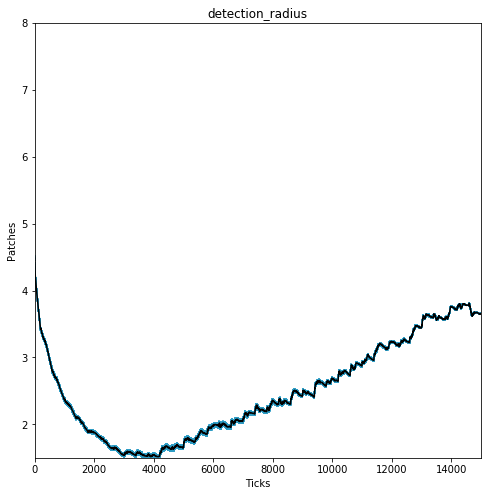

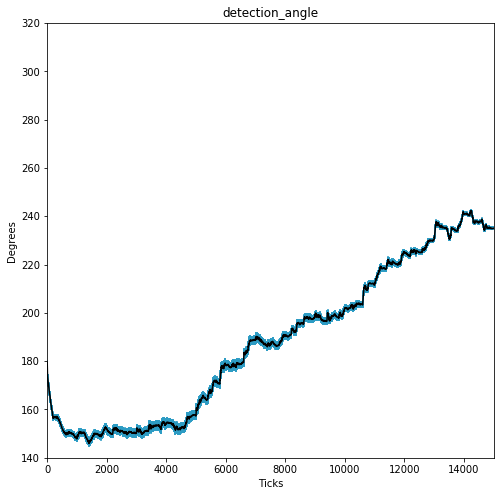

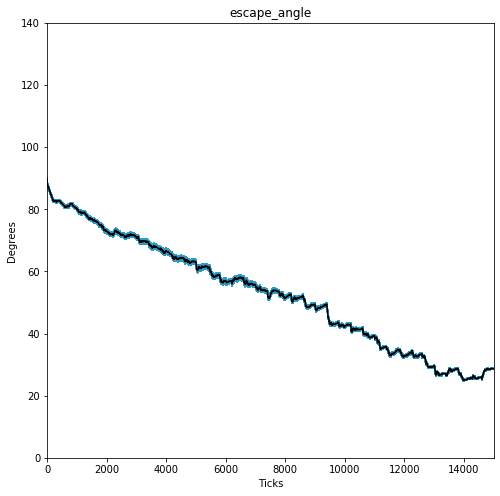

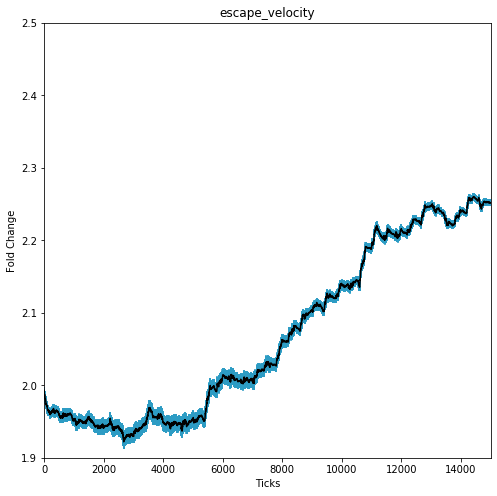

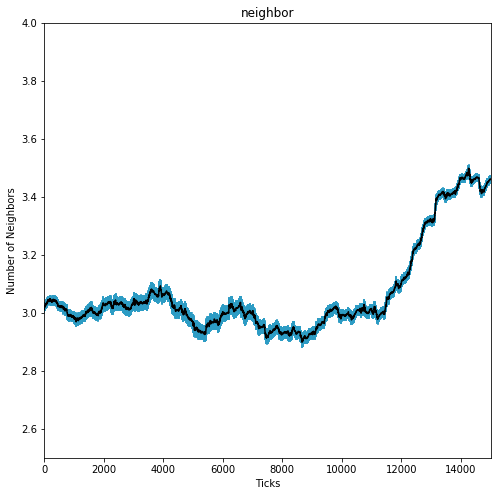

In [21]:
sensitivity_types = ['detection_radius', 'detection_angle', 'escape_angle', 'escape_velocity', 'neighbor']
units = ['Patches', 'Degrees', 'Degrees', 'Fold Change', 'Number of Neighbors']
limits = [[1.5, 8],[140, 320], [0, 140],[1.9, 2.5], [2.5, 4] ]
graph(energy_mating, sensitivity_types, units, limits, 'energymating' )

C:\Users\Benji\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Benji\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


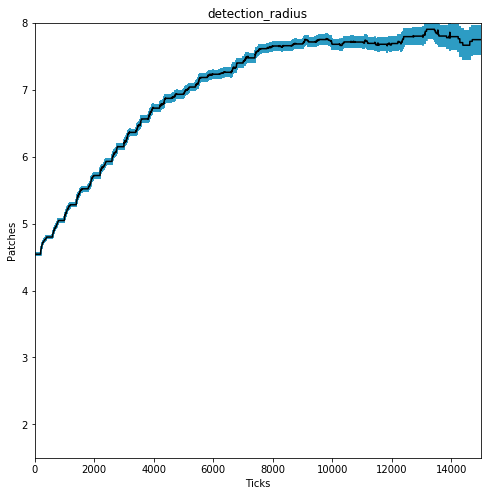

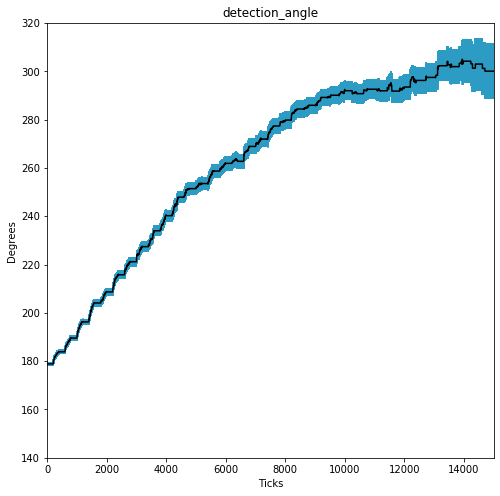

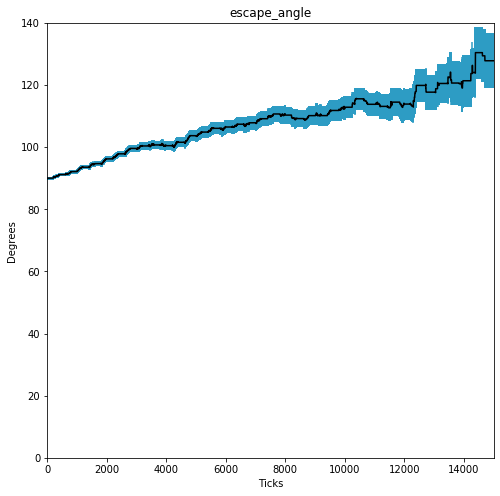

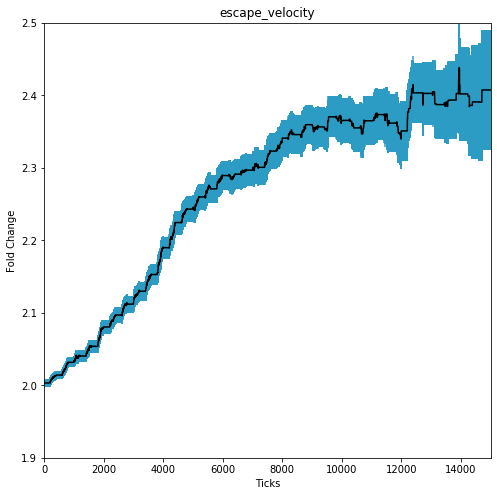

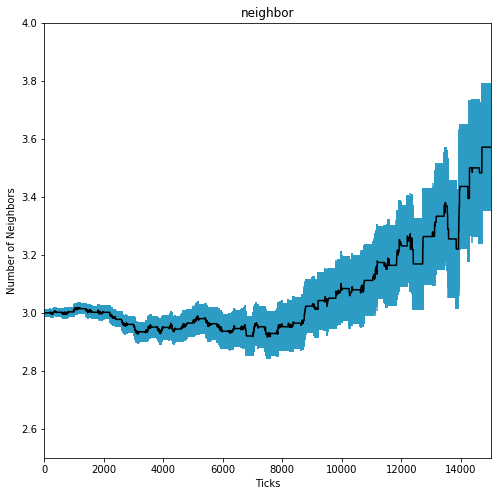

In [22]:
sensitivity_types = ['detection_radius', 'detection_angle', 'escape_angle', 'escape_velocity', 'neighbor']
units = ['Patches', 'Degrees', 'Degrees', 'Fold Change', 'Number of Neighbors']
limits = [[1.5, 8],[140, 320], [0, 140],[1.9, 2.5], [2.5, 4] ]
graph(random_mating, sensitivity_types, units, limits, 'randommating' )

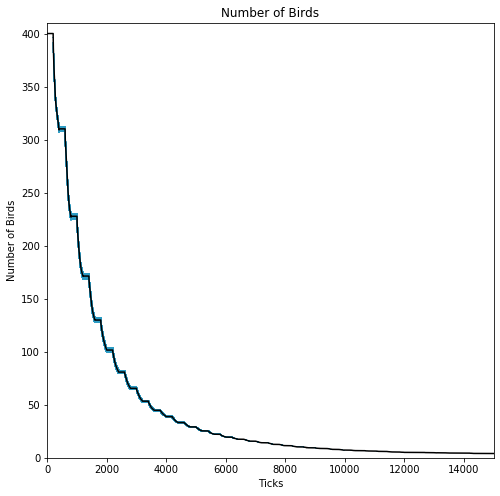

In [59]:
means= random_data[['ticks', 'count birds']].groupby('ticks').mean()['count birds']
stdev = np.sqrt(random_data[['ticks', 'count birds']].groupby('ticks').var()['count birds'])
sqrt_count = np.sqrt(random_data[['ticks', 'count birds']].groupby('ticks').count()['count birds'])
sem = stdev/sqrt_count

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(x = range(len(means)), y = means, yerr = sem, color = 'black',ecolor = '#2d9cc4')
ax.set_title('Number of Birds')
ax.set_xlabel('Ticks')
ax.set_ylabel('Number of Birds')
ax.set_ylim([0, 410])
ax.set_xlim([0, 15000])
filename = 'BirdsOverTimeRandomMating.png'
plt.savefig(filename)

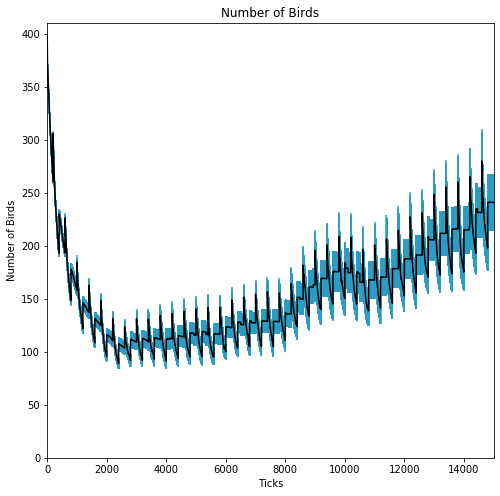

In [60]:
means= hist_data[['ticks', 'count birds']].groupby('ticks').mean()['count birds']
stdev = np.sqrt(hist_data[['ticks', 'count birds']].groupby('ticks').var()['count birds'])
sqrt_count = np.sqrt(hist_data[['ticks', 'count birds']].groupby('ticks').count()['count birds'])
sem = stdev/sqrt_count

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(x = range(len(means)), y = means, yerr = sem, color = 'black',ecolor = '#2d9cc4')
ax.set_title('Number of Birds')
ax.set_xlabel('Ticks')
ax.set_ylabel('Number of Birds')
ax.set_ylim([0, 410])
ax.set_xlim([0, 15000])
filename = 'BirdsOverTimeEnergyMating.png'
plt.savefig(filename)


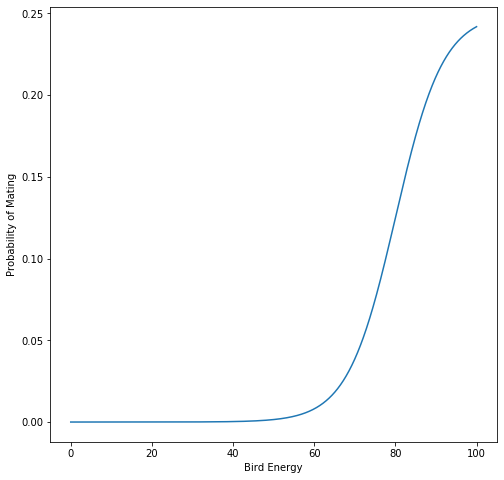

In [61]:
def logistic(x):
    return 0.25/(1 + np.exp(-0.17 * (x-80)))
xs = np.linspace(0, 100, 1000)
ys = [logistic(x) for x in xs]
fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(xs, ys)
ax.set_xlabel('Bird Energy')
ax.set_ylabel('Probability of Mating')
plt.savefig('MatingLogisticFunction.png');